<a href="https://colab.research.google.com/github/23PA1A05E0/ML/blob/main/LinearRegression_Boston.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [100]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [101]:
dataset = pd.read_csv("/content/boston.csv")

In [102]:
dataset

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
502,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
503,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
504,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0


In [103]:
X = dataset.drop("Price" , axis = 1)
y = dataset.Price

In [104]:
## Train test split

In [105]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

In [106]:
X_train

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
220,220,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
71,71,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
240,240,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
417,417,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,323,0.28392,0.0,7.38,0.0,0.493,5.708,74.3,4.7211,5.0,287.0,19.6,391.13,11.74
192,192,0.08664,45.0,3.44,0.0,0.437,7.178,26.3,6.4798,5.0,398.0,15.2,390.49,2.87
117,117,0.15098,0.0,10.01,0.0,0.547,6.021,82.6,2.7474,6.0,432.0,17.8,394.51,10.30
47,47,0.22927,0.0,6.91,0.0,0.448,6.030,85.5,5.6894,3.0,233.0,17.9,392.74,18.80


In [107]:
from sklearn.preprocessing import StandardScaler

In [108]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [109]:
X_test = scaler.transform(X_test)

In [110]:
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score

In [111]:
reg = LinearRegression()
reg.fit(X_train, y_train)

LinearRegression()

In [112]:
mse = cross_val_score(reg,X_train,y_train,cv=5,scoring="neg_mean_squared_error").mean()

In [113]:
np.mean(mse)

np.float64(-21.193819862592196)

In [114]:
reg_pred = reg.predict(X_test)

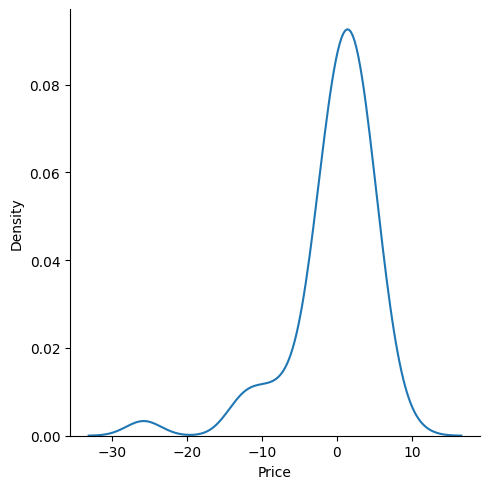

In [115]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind = "kde")

In [116]:
from sklearn.metrics import r2_score

In [117]:
score = r2_score(y_test,reg_pred)

In [118]:
score

0.5914577039362052

Ridge Regression

In [119]:
 from sklearn.linear_model import Ridge

In [120]:
ridge_reg = Ridge()

In [121]:
parameters = {"alpha" : [1,2,5,10,20,30,40,50,60,70,80,90]}

In [122]:
from sklearn.model_selection import GridSearchCV
ridgeCV = GridSearchCV(ridge_reg, parameters, scoring="neg_mean_squared_error")
ridgeCV.fit(X_train, y_train)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 2, 5, 10, 20, 30, 40, 50, 60, 70, 80,
                                   90]},
             scoring='neg_mean_squared_error')

In [123]:
print("Best alpha:", ridgeCV.best_params_)
print("Best model score (negative MSE):", ridgeCV.best_score_)

Best alpha: {'alpha': 5}
Best model score (negative MSE): -21.141180009018772


In [124]:
ridge_pred = ridgeCV.predict(X_test)

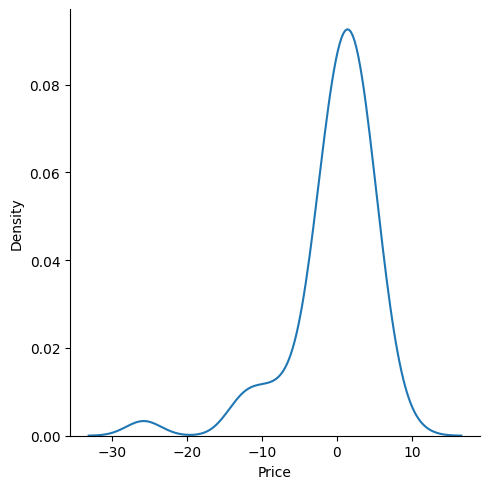

In [125]:
import seaborn as sns
sns.displot(reg_pred-y_test,kind = "kde")

In [126]:
score = r2_score(y_test,ridge_pred)

In [127]:
score

0.5859440252788194

**LASSO**

In [128]:
from sklearn.linear_model import Lasso

In [129]:
lasso_reg = Lasso()

In [ ]:
from sklearn.model_selection import GridSearchCV
lassoCV = GridSearchCV(lasso_reg, parameters, scoring="neg_mean_squared_error")
lassoCV.fit(X_train, y_train)

In [ ]:
print(lassoCV.best_score_)